In [0]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import roc_auc_score
from keras.layers import Input
import keras
from keras.models import Model

Using TensorFlow backend.


In [0]:
#image augmentation 
#increasing 1000 images in each class
import random
import os
from skimage import io
import random
from scipy import ndarray
import skimage as sk
from skimage import transform
from skimage import util
from skimage.util import random_noise
from skimage.transform import rotate
import cv2
# our folder path containing some images
folder_path = 'G:\state-farm-distracted-driver-detection\imgs2\c9'
# the number of file to generate
num_files_desired = 1000

# loop on all files of the folder and build a list of files paths
images = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
num_generated_files = 0
image_to_transform=[]
while num_generated_files <= num_files_desired:
    # random image from the folder
    image_path = random.choice(images)
    # read image as an two dimensional array of pixels
    x= cv2.imread(image_path)
    image_to_transform.append(x)
    num_generated_files=num_generated_files+1
    #print(num_generated_files)

In [0]:
#print(type(image_to_transform))
img=np.array(image_to_transform)

In [0]:
import cv2
folder_path='G:\state-farm-distracted-driver-detection\imgs2\c9'
i=0
new_file_path = '%s/augmented_image_%i.jpg' % (folder_path, num_generated_files)
print(new_file_path)
# write image to the disk
x=32000
for i in range(1001):
    new_file_path = '%s/img_%s.jpg' % (folder_path,x)
    x=x+1
    sk.io.imsave(new_file_path, img[i])

In [0]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.4, 
    zoom_range = 0.3,
    horizontal_flip = True,
    validation_split=0.2) 

test_datagen = ImageDataGenerator(rescale = 1./255)

In [0]:
train_generator = train_datagen.flow_from_directory(
    'G:\state-farm-distracted-driver-detection\imgs',
    target_size = (32, 32),
    color_mode = 'rgb',
    batch_size = 32,
    class_mode='categorical',
    subset='training'
    )
validation_generator = train_datagen.flow_from_directory(
    'G:\state-farm-distracted-driver-detection\imgs',
    target_size = (32, 32),
    color_mode = 'rgb',
    batch_size = 32,
    class_mode = 'categorical',
    subset='validation')

Found 25764 images belonging to 10 classes.
Found 6436 images belonging to 10 classes.


In [0]:
import cv2
import matplotlib.pyplot as plt
batch_size=32
from keras.callbacks import History 
history = History()

In [0]:
#VGG16
batch_size=32
num_val_samples=22424
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape = (32, 32, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

history=model.fit_generator(train_generator, samples_per_epoch=25764, nb_epoch=10, 
                    validation_data=validation_generator, nb_val_samples=800)

C:\Users\ACER\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
C:\Users\ACER\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., steps_per_epoch=805, epochs=10, validation_steps=800)`


Epoch 1/10
805/805 [==============================] - 688s 854ms/step - loss: 2.0793 - acc: 0.2201 - val_loss: 1.6178 - val_acc: 0.4237
Epoch 2/10
805/805 [==============================] - 493s 613ms/step - loss: 1.5415 - acc: 0.4327 - val_loss: 1.1992 - val_acc: 0.5998
Epoch 3/10
805/805 [==============================] - 489s 607ms/step - loss: 1.2591 - acc: 0.5471 - val_loss: 0.9681 - val_acc: 0.6792
Epoch 4/10
805/805 [==============================] - 664s 825ms/step - loss: 1.0572 - acc: 0.6300 - val_loss: 0.8053 - val_acc: 0.7256
Epoch 5/10
805/805 [==============================] - 608s 755ms/step - loss: 0.9299 - acc: 0.6796 - val_loss: 0.6949 - val_acc: 0.7649
Epoch 6/10
805/805 [==============================] - 629s 781ms/step - loss: 0.8426 - acc: 0.7115 - val_loss: 0.6481 - val_acc: 0.7806
Epoch 7/10
805/805 [==============================] - 490s 608ms/step - loss: 0.7765 - acc: 0.7384 - val_loss: 0.5987 - val_acc: 0.8034
Epoch 8/10
805/805 [============================

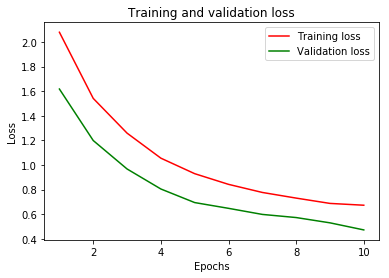

In [0]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

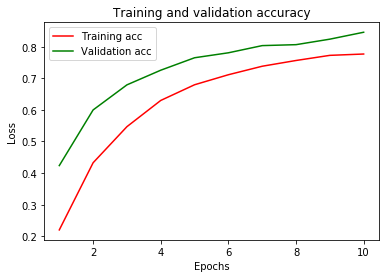

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
model.save('model.h5')
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
# load json and create model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [0]:
loss= model.evaluate_generator(validation_generator,steps=800)
print("Loss: " + str(loss[0]) + "     Accuracy" + str(loss[1]))

Loss: 0.4745022956625665     Accuracy0.845064344005022


In [0]:
from keras.preprocessing import image
import numpy as np
from keras.models import load_model
from keras.models import Model
#model = load_model('model.h5')
test_image =image.load_img('G:\state-farm-distracted-driver-detection\imgabc.jpg',target_size = (32,32))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
images = np.vstack([test_image])
classes =loaded_model.predict(images)
print (classes)

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [0]:
#Inception
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.4, # random application of shearing
    zoom_range = 0.3,
    horizontal_flip = True,
    validation_split=0.2) # randomly flipping half of the images horizontally

# data generator for test set
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator3 = train_datagen.flow_from_directory(
    'G:\state-farm-distracted-driver-detection\imgs',
    target_size = (32, 32),
    color_mode = 'rgb',
    batch_size = 32,
    class_mode='categorical',
    subset='training'
    )
validation_generator3 = train_datagen.flow_from_directory(
      'G:\state-farm-distracted-driver-detection\imgs',
    target_size = (32, 32),
    color_mode = 'rgb',
    batch_size = 32,
    class_mode = 'categorical',
    subset='validation')

input1 = Input(shape = (32, 32, 3))

layer_1 = Conv2D(64, (1,1), padding='same', activation='relu')(input1)
layer_1 = Conv2D(64, (3,3), padding='same', activation='relu')(layer_1)
layer_2 = Conv2D(64, (1,1), padding='same', activation='relu')(input1)
layer_2 = Conv2D(64, (5,5), padding='same', activation='relu')(layer_2)
layer_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(input1)
layer_3 = Conv2D(64, (1,1), padding='same', activation='relu')(layer_3)

output = keras.layers.concatenate([layer_1, layer_2, layer_3], axis = 3)

output = Flatten()(output)
out    = Dense(10, activation='softmax')(output)

model2 = Model(inputs = input1, outputs = out)

from keras.optimizers import SGD
epochs = 10
alpha = 0.01
decay = alpha/epochs
sgd = SGD(lr=alpha, momentum=0.9, decay=decay, nesterov=False)
model2.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
history=model2.fit_generator(train_generator3, samples_per_epoch=25764, nb_epoch=epochs, 
                    validation_data=validation_generator3, nb_val_samples=800)

Found 25764 images belonging to 10 classes.
Found 6436 images belonging to 10 classes.


C:\Users\ACER\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
C:\Users\ACER\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., steps_per_epoch=805, epochs=10, validation_steps=800)`


Epoch 1/10
805/805 [==============================] - 1558s 2s/step - loss: 1.7459 - acc: 0.3886 - val_loss: 1.1894 - val_acc: 0.6028
Epoch 2/10
805/805 [==============================] - 1188s 1s/step - loss: 0.9483 - acc: 0.6916 - val_loss: 0.7811 - val_acc: 0.7486
Epoch 3/10
805/805 [==============================] - 1198s 1s/step - loss: 0.6471 - acc: 0.7984 - val_loss: 0.5748 - val_acc: 0.8184
Epoch 4/10
805/805 [==============================] - 1516s 2s/step - loss: 0.4974 - acc: 0.8451 - val_loss: 0.4651 - val_acc: 0.8549
Epoch 5/10
805/805 [==============================] - 1609s 2s/step - loss: 0.4174 - acc: 0.8728 - val_loss: 0.4006 - val_acc: 0.8761
Epoch 6/10
805/805 [==============================] - 1277s 2s/step - loss: 0.3584 - acc: 0.8920 - val_loss: 0.3561 - val_acc: 0.8902
Epoch 7/10
805/805 [==============================] - 1548s 2s/step - loss: 0.3193 - acc: 0.9052 - val_loss: 0.3197 - val_acc: 0.9038
Epoch 8/10
805/805 [==============================] - 1534s 2s

In [0]:
model2.save('model2.h5')
model2_json = model2.to_json()
with open("model2.json", "w") as json_file:
    json_file.write(model2_json)
# serialize weights to HDF5
model2.save_weights("model2.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
from keras.models import model_from_json
json_file = open('model2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model2 = model_from_json(loaded_model_json)
# load weights into new model
loaded_model2.load_weights("model2.h5")
print("Loaded model from disk")

Loaded model from disk


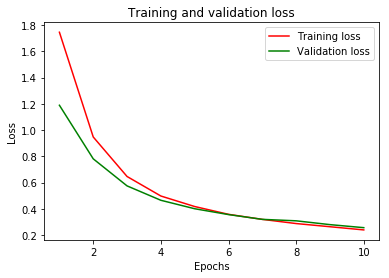

In [0]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

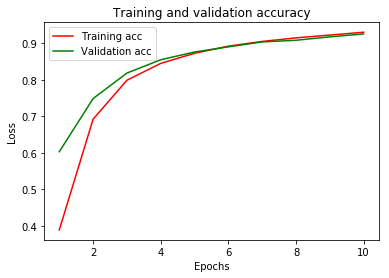

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
from keras.preprocessing import image
import numpy as np
from keras.models import load_model
from keras.models import Model
#model = load_model('model.h5')
test_image =image.load_img('G:\state-farm-distracted-driver-detection\img5.jpg',target_size = (32,32))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
images = np.vstack([test_image])
classes =loaded_model2.predict(images)
print (classes)

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [0]:
from keras.optimizers import SGD
epochs=10
alpha = 0.01
decay = alpha/epochs
sgd = SGD(lr=alpha, momentum=0.9, decay=decay, nesterov=False)
loaded_model2.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
loss=loaded_model2.evaluate_generator(validation_generator3,steps=800)
print("Loss: " + str(loss[0]) + "     Accuracy " + str(loss[1]))

Loss: 0.26233537408318053     Accuracy 0.9239249843063403


In [0]:
#Alexnet
shape = (77,77,3)

classifier = Sequential()

classifier.add(Conv2D(96,(5,5),strides = (2,2),input_shape=shape,activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides =(2,2)))
classifier.add(Conv2D(256,(3,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides =(2,2)))
classifier.add(Conv2D(384,3,3,activation = 'relu'))
classifier.add(Conv2D(384,3,3,activation = 'relu'))
classifier.add(Conv2D(384,3,3,activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides =(2,2)))

classifier.add(Flatten())
classifier.add(Dense(4096, input_shape=shape,activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(Dense(4096, activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(Dense(1000, activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(Dense(10, activation = 'softmax'))
classifier.summary()

epochs = 10
alpha = 0.01
decay = alpha/epochs
sgd = SGD(lr=alpha, momentum=0.9, decay=decay, nesterov=False)
classifier.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
history=classifier.fit_generator(train_generator1, samples_per_epoch=25764, nb_epoch=epochs, 
                    validation_data=validation_generator1, nb_val_samples=800)

C:\Users\ACER\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(384, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ACER\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(384, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\ACER\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(384, (3, 3), activation="relu")`
  if sys.path[0] == '':


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 37, 37, 96)        7296      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 256)       221440    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 6, 6, 384)         885120    
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 4, 4, 384)         1327488   
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 2, 2, 384)         1327488   
__________

C:\Users\ACER\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
C:\Users\ACER\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., steps_per_epoch=805, epochs=10, validation_steps=800)`


Epoch 1/10
805/805 [==============================] - 2176s 3s/step - loss: 2.3024 - acc: 0.1041 - val_loss: 2.3016 - val_acc: 0.1025
Epoch 2/10
805/805 [==============================] - 1735s 2s/step - loss: 2.2971 - acc: 0.1161 - val_loss: 2.2617 - val_acc: 0.1485
Epoch 3/10
805/805 [==============================] - 1727s 2s/step - loss: 2.0568 - acc: 0.1995 - val_loss: 1.8073 - val_acc: 0.2806
Epoch 4/10
805/805 [==============================] - 1740s 2s/step - loss: 1.5096 - acc: 0.4235 - val_loss: 1.4227 - val_acc: 0.4886
Epoch 5/10
805/805 [==============================] - 1736s 2s/step - loss: 0.9516 - acc: 0.6574 - val_loss: 0.7795 - val_acc: 0.7233
Epoch 6/10
805/805 [==============================] - 1727s 2s/step - loss: 0.5882 - acc: 0.7979 - val_loss: 0.4370 - val_acc: 0.8538
Epoch 7/10
805/805 [==============================] - 1741s 2s/step - loss: 0.3932 - acc: 0.8715 - val_loss: 0.2778 - val_acc: 0.9086
Epoch 8/10
805/805 [==============================] - 1740s 2s

In [0]:
classifier.save('classifier.h5')
classifier_json = classifier.to_json()
with open("classifier.json", "w") as json_file:
    json_file.write(classifier_json)
# serialize weights to HDF5
classifier.save_weights("classifier.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
from keras.models import model_from_json
json_file = open('classifier.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_classifier = model_from_json(loaded_model_json)
# load weights into new model
loaded_classifier.load_weights("classifier.h5")
print("Loaded model from disk")

Loaded model from disk


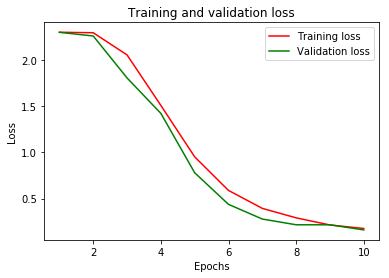

In [0]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

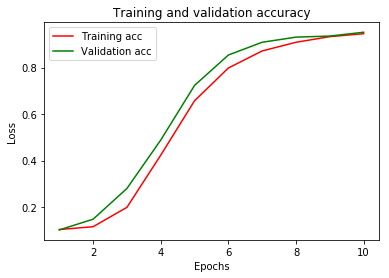

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
from keras.optimizers import SGD
epochs=10
alpha = 0.01
decay = alpha/epochs
sgd = SGD(lr=alpha, momentum=0.9, decay=decay, nesterov=False)
loaded_classifier.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
loss=loaded_classifier.evaluate_generator(validation_generator1,steps=800)
print("Loss: " + str(loss[0]) + "     Accuracy " + str(loss[1]))

Loss: 0.16407773003414916     Accuracy 0.9497018204645323


In [0]:
from keras.preprocessing import image
import numpy as np
from keras.models import load_model
from keras.models import Model
#model = load_model('model.h5')
test_image =image.load_img('G:\state-farm-distracted-driver-detection\img5.jpg',target_size = (77,77))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
images = np.vstack([test_image])
classes =loaded_classifier.predict(images)
print (classes)

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
